In [1]:
from keras.models import Sequential
import numpy as np, pandas as pd, tensorflow as tf
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import utils

In [7]:
x = pd.read_csv('fashion_mnist.csv')
X_ = np.array(x)

In [8]:
X_.shape

(10000, 785)

In [9]:
X = X_[:, 1:]
X = X/255.0
Y = X_[:, 0]
print(X.shape, Y.shape)

(10000, 784) (10000,)


In [2]:
import matplotlib.pyplot as plt

def drawImg(X):
    X = X.reshape((28, 28))
    plt.imshow(X, cmap='gray')
    plt.show()

In [17]:
X_train = X.reshape((-1, 28, 28, 1))
Y_train = utils.to_categorical(Y)

In [19]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
print(X_train.shape, Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


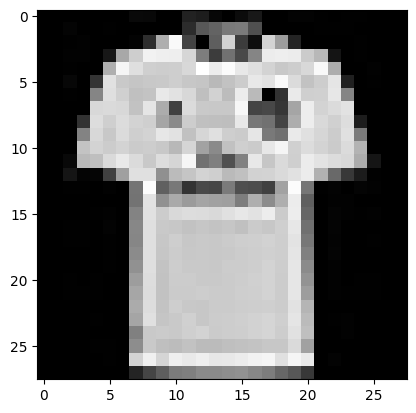

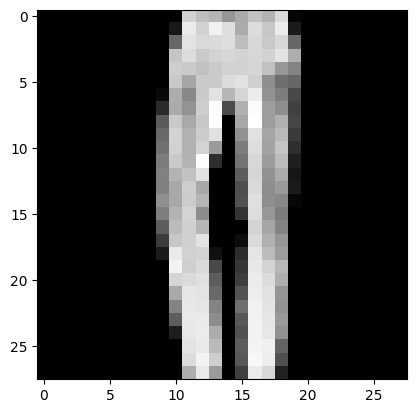

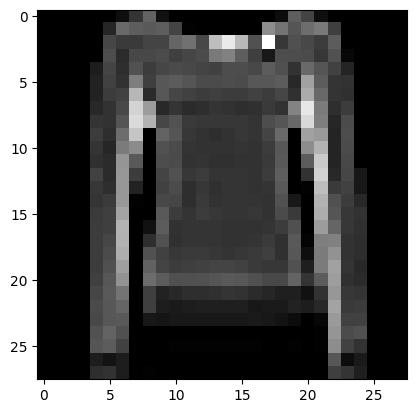

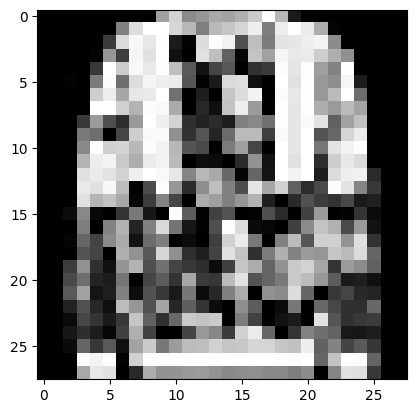

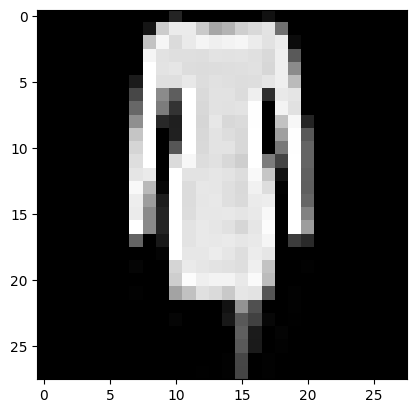

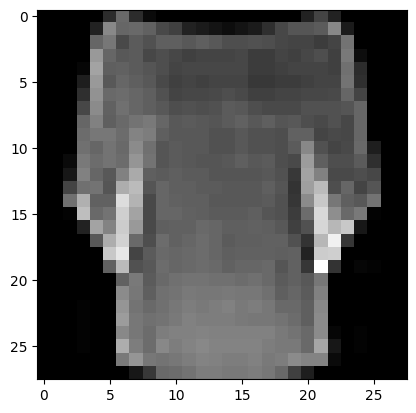

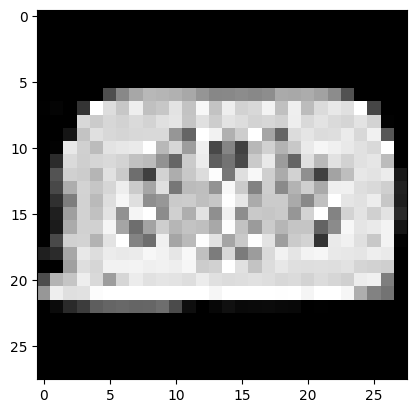

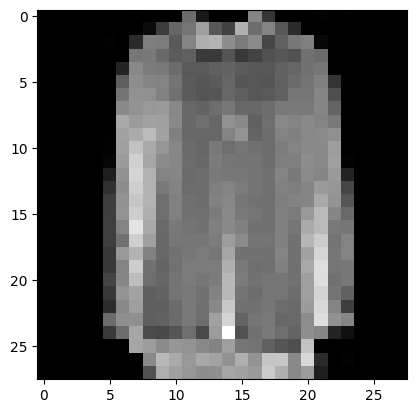

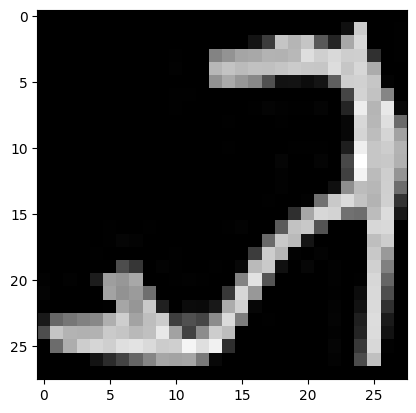

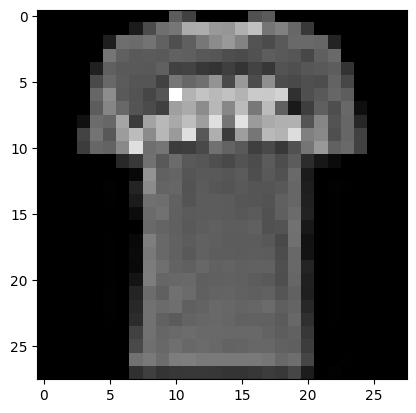

In [21]:
for i in range(10):
    drawImg(X_train[i])

In [6]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(32, (5, 5), padding='same', activation='relu'))
model.add(Convolution2D(8, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        51232     
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 8)           6408      
                                                      

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
hist = model.fit(X_train, Y_train, epochs=20, validation_split=0.20, shuffle=True, batch_size=256)

Epoch 1/20


32/32 [==============================] - 13s 293ms/step - loss: 1.6417 - accuracy: 0.4106 - val_loss: 0.9576 - val_accuracy: 0.6765
Epoch 2/20
32/32 [==============================] - 9s 273ms/step - loss: 0.7534 - accuracy: 0.7170 - val_loss: 0.7520 - val_accuracy: 0.7205
Epoch 3/20
32/32 [==============================] - 9s 268ms/step - loss: 0.6510 - accuracy: 0.7542 - val_loss: 0.6205 - val_accuracy: 0.7685
Epoch 4/20
32/32 [==============================] - 9s 268ms/step - loss: 0.5871 - accuracy: 0.7793 - val_loss: 0.5907 - val_accuracy: 0.7920
Epoch 5/20
32/32 [==============================] - 9s 275ms/step - loss: 0.5437 - accuracy: 0.8004 - val_loss: 0.5629 - val_accuracy: 0.8065
Epoch 6/20
32/32 [==============================] - 9s 270ms/step - loss: 0.4977 - accuracy: 0.8171 - val_loss: 0.5351 - val_accuracy: 0.8055
Epoch 7/20
32/32 [==============================] - 9s 269ms/step - loss: 0.4633 - accuracy: 0.8338 - val_loss: 0.5090 - val_accuracy: 0.8225
Epo

In [31]:
h = hist.history

In [33]:
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

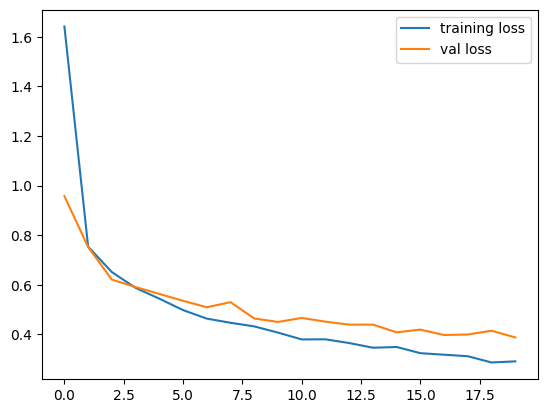

In [35]:
plt.plot(h['loss'], label="training loss")
plt.plot(h['val_loss'], label='val loss')
plt.legend()

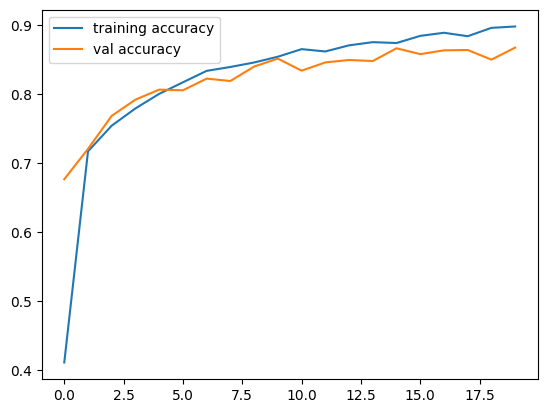

In [36]:
plt.plot(h['accuracy'], label="training accuracy")
plt.plot(h['val_accuracy'], label='val accuracy')
plt.legend()